In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing   import scale
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabaz_score
from sklearn.neighbors import NearestNeighbors

In [4]:
# Lê os dados do arquivo
df = pd.io.parsers.read_csv('data8.csv')

# Prepara um DataFrame estandardizado
scaledData = scale(df.values)

## Análise manual de gráficos

Gráfico das 10 componentes sobrepostas


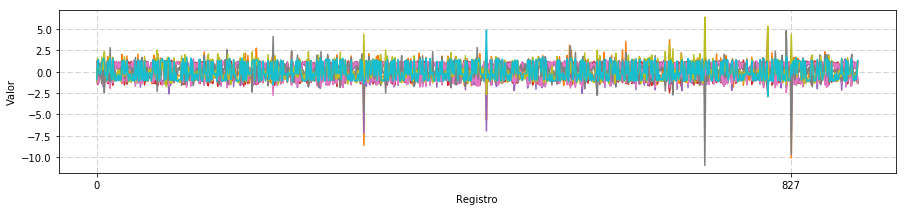

Gráfico da componente  1


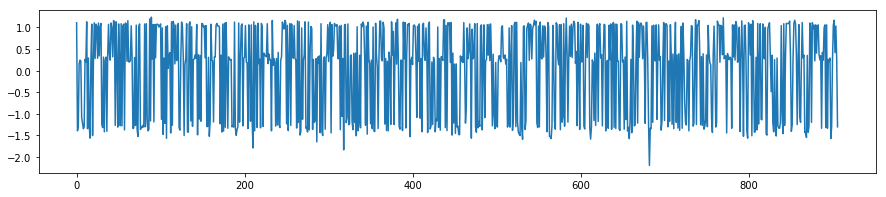

Gráfico da componente  2


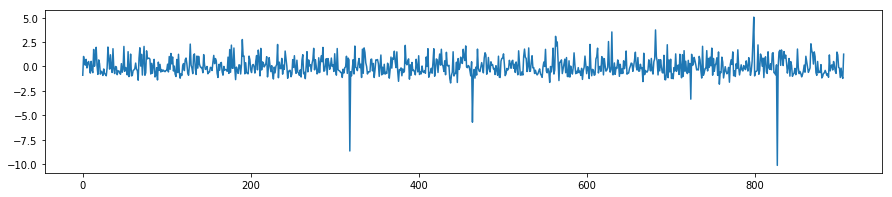

Gráfico da componente  3


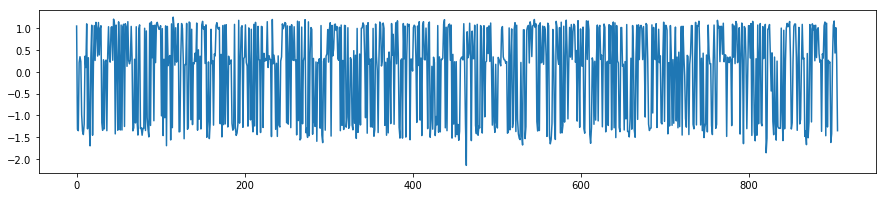

Gráfico da componente  4


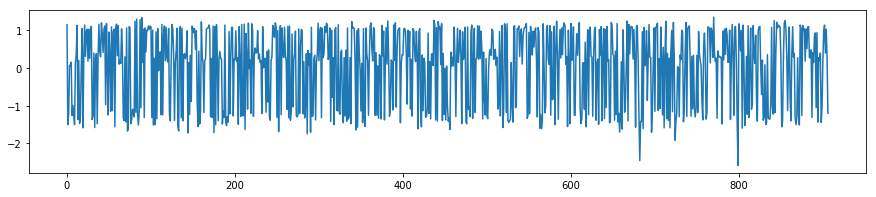

Gráfico da componente  5


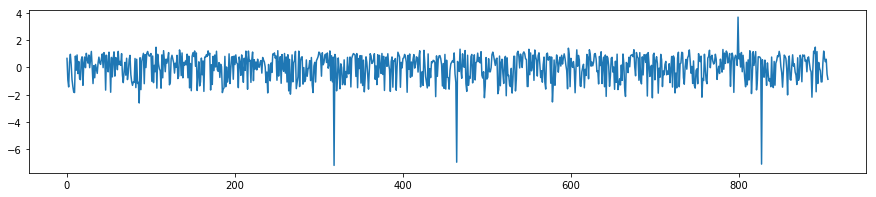

Gráfico da componente  6


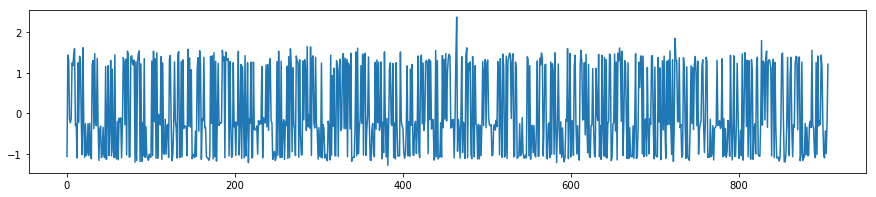

Gráfico da componente  7


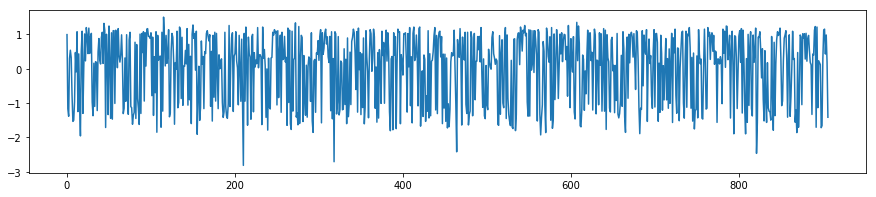

Gráfico da componente  8


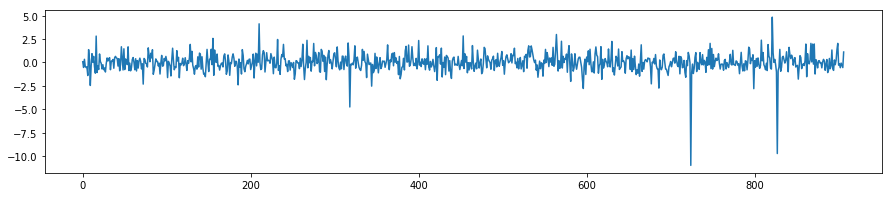

Gráfico da componente  9


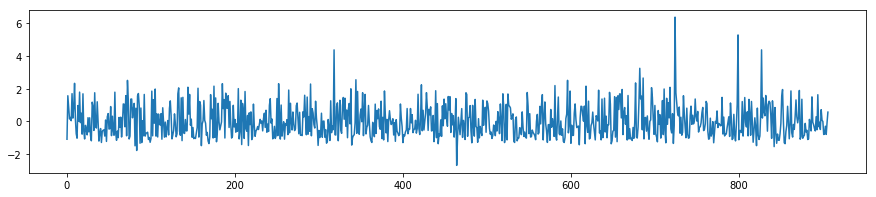

Gráfico da componente  10


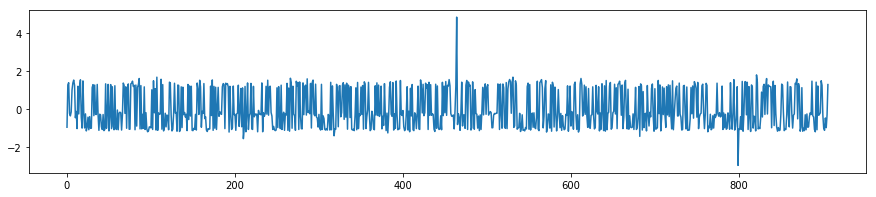

In [7]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)

ax.set_xlabel('Registro')
ax.set_ylabel('Valor')
x = range(len(scaledData))
ys = np.transpose(scaledData)

ax.set_xticks(np.arange(0, 900, 827))
ax.grid(color='lightgray', linestyle='--', linewidth=1)

print("Gráfico das 10 componentes sobrepostas")
for y in ys:
    ax.plot(x, y, '-')

plt.show()
    
for i in range(len(ys)):
    y = ys[i]
    print("Gráfico da componente ", i+1)
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(111)
    ax.plot(x, y, '-')
    plt.show()


Gráfico da soma do módulo das 10 componentes 


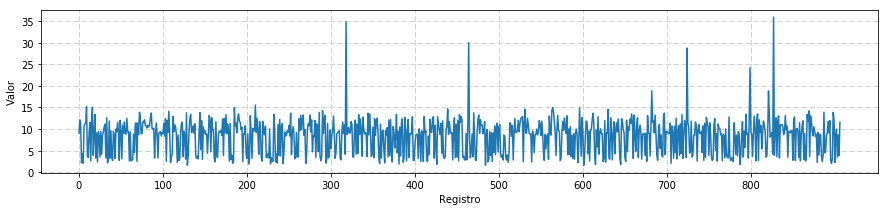

In [9]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)

ax.set_xlabel('Registro')
ax.set_ylabel('Valor')
x = range(len(scaledData))
ys = np.transpose(scaledData)

ax.set_xticks(np.arange(0, 900, 100))
ax.grid(color='lightgray', linestyle='--', linewidth=1)

print("Gráfico da soma do módulo das 10 componentes ")
vet = []
for y in np.absolute(scaledData):
    sum = 0
    for i in y:
        sum += i
    vet.append(sum)
ax.plot(x, vet, '-')
plt.show()

Já temos, com estes 12 gráficos de Valor x Registro, uma boa ideia de quais podem ser nossas 7 anomalias. Que na verdade, pela minha observação poderiam ser 8: [210, 318, 464, 682, 724, 799, 821, 827]

## Análise com soma de dados absolutos

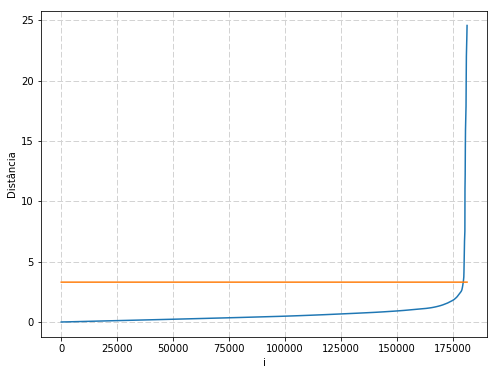

eps=3.3 	k=7
[318, 464, 682, 724, 799, 821, 827]


In [11]:
n_neighbors = 200
vet = np.array(vet)[:].reshape(-1, 1)
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(vet)
distances, indices = nbrs.kneighbors(vet)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.set_xlabel('i')
ax.set_ylabel('Distância')
x = range(len(distances)*n_neighbors)
distances = sorted(distances.flatten())

initX = 0
suggestedEps = 3.3
ax.grid(color='lightgray', linestyle='--', linewidth=1)
ax.plot(x[initX:], distances[initX:])
ax.plot(x[initX:], [suggestedEps]* (len(x)-initX))
plt.show()

dbscan = DBSCAN(min_samples=n_neighbors, eps=suggestedEps, n_jobs=3)
dbscan.fit(vet)
n_outliers = 0
outliers0 = []
for x in range(len(dbscan.labels_)):
    if dbscan.labels_[x] == -1:
        n_outliers += 1
        outliers0.append(x)

print('eps={} \tk={}'.format(suggestedEps, n_outliers))
print(outliers0)

## Análise sobre todas componentes conjuntamente

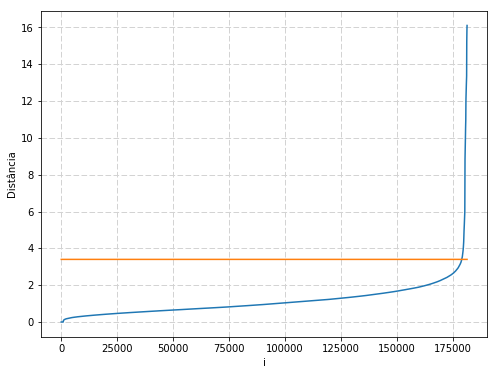

eps=3.4 	k=7
[210, 318, 464, 682, 724, 799, 827]


In [24]:
n_neighbors = 200
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(scaledData)
distances, indices = nbrs.kneighbors(scaledData)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.set_xlabel('i')
ax.set_ylabel('Distância')
x = range(len(distances)*n_neighbors)
distances = sorted(distances.flatten())

initX = 0
suggestedEps = 3.4
ax.grid(color='lightgray', linestyle='--', linewidth=1)
ax.plot(x[initX:], distances[initX:])
ax.plot(x[initX:], [suggestedEps]* (len(x)-initX))
plt.show()

dbscan = DBSCAN(min_samples=n_neighbors, eps=suggestedEps, n_jobs=3)
dbscan.fit(scaledData)
n_outliers = 0
outliers1 = []
for x in range(len(dbscan.labels_)):
    if dbscan.labels_[x] == -1:
        n_outliers += 1
        outliers1.append(x)

print('eps={} \tk={}'.format(suggestedEps, n_outliers))
print(outliers1)


## Análise por componentes individuais

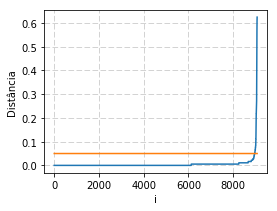

eps=0.05 	k=9
[210, 286, 318, 377, 464, 682, 724, 827, 840


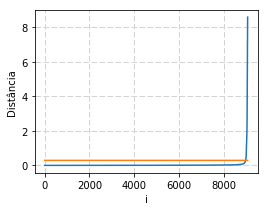

eps=0.29 	k=10
[190, 318, 464, 563, 630, 682, 724, 798, 799, 827


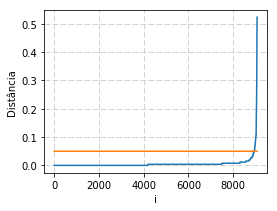

eps=0.05 	k=15
[16, 107, 179, 306, 358, 377, 400, 464, 531, 686, 724, 799, 821, 827, 840


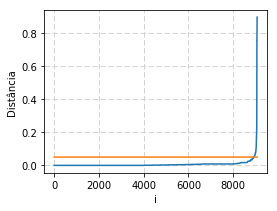

eps=0.05 	k=13
[89, 109, 144, 239, 247, 286, 316, 617, 682, 724, 770, 799, 827


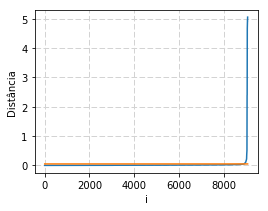

eps=0.05 	k=20
[86, 106, 266, 318, 439, 464, 497, 523, 578, 597, 642, 665, 691, 697, 756
799, 827, 858, 887, 891


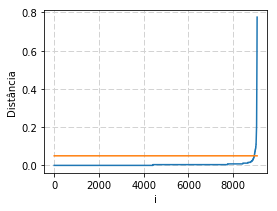

eps=0.05 	k=18
[109, 210, 278, 288, 316, 382, 453, 464, 579, 617, 631, 682, 724, 749, 799
816, 827, 861


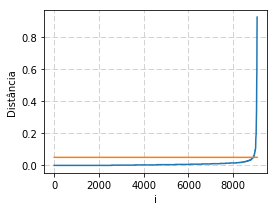

eps=0.05 	k=17
[16, 83, 105, 115, 145, 210, 272, 318, 344, 400, 464, 494, 607, 677, 686
821, 827


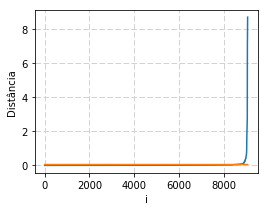

eps=0.05 	k=84
[6, 9, 16, 72, 78, 101, 105, 107, 115, 128, 130, 146, 155, 156, 175
185, 204, 210, 232, 239, 252, 262, 264, 267, 275, 285, 290, 316, 318, 324
335, 338, 344, 363, 378, 385, 388, 400, 411, 421, 422, 427, 428, 439, 453
464, 499, 514, 531, 534, 542, 548, 564, 570, 579, 581, 595, 596, 618, 630
642, 663, 665, 677, 686, 697, 706, 718, 724, 747, 749, 799, 808, 816, 821
827, 838, 852, 861, 862, 867, 869, 871, 899


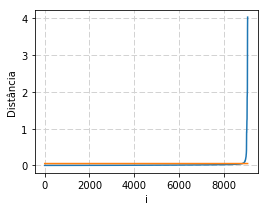

eps=0.05 	k=39
[9, 72, 81, 83, 105, 133, 144, 156, 160, 175, 185, 204, 216, 252, 290
299, 318, 338, 339, 344, 422, 464, 581, 596, 610, 618, 661, 677, 682, 686
696, 711, 718, 724, 799, 821, 827, 842, 852


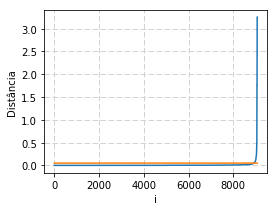

eps=0.05 	k=13
[107, 179, 210, 318, 322, 464, 531, 682, 686, 724, 799, 821, 827


In [22]:
n_neighbors = 10
suggestedEpses = [0.05,0.29,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
countOccur = {}
for i in range(10):
    scaledData_i = scaledData[:,i].reshape(-1, 1)
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(scaledData_i)
    distances, indices = nbrs.kneighbors(scaledData_i)
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)


    distances = sorted(distances.flatten())
    x = range(len(distances))

    initX = 0
    suggestedEps = suggestedEpses[i]
    #ax.set_xticks(np.arange(initX, 6000, 100))
    #ax.set_yticks(np.arange(0, 20, 1))
    
    ax.set_xlabel('i')
    ax.set_ylabel('Distância')
    
    ax.grid(color='lightgray', linestyle='--', linewidth=1)
    ax.plot(x[initX:], distances[initX:])
    ax.plot(x[initX:], [suggestedEps]* (len(x)-initX))
    plt.show()
#
    dbscan = DBSCAN(min_samples=n_neighbors, eps=suggestedEpses[i], n_jobs=3)
    dbscan.fit(scaledData_i)
    n_outliers = 0
    outliers = []
    for j in range(len(dbscan.labels_)):
        if dbscan.labels_[j] == -1:
            n_outliers += 1
            outliers.append(j)
            if x in countOccur:
                countOccur[j] += 1
            else:
                countOccur[j] = 1
            
            
    print('eps={} \tk={}\n'.format(suggestedEpses[i], n_outliers), end='[')
    for i in range(0, len(outliers), 15):
        print(", ".join([str(v) for v in outliers[i:i+15]]))

In [23]:
print('Ordenando os outliers por frequência, temos os seguintes resultados:')
sortedPairs = sorted([(countOccur[el], el) for el in countOccur])[::-1][:7]
print(sortedPairs)
outliers2 = sorted([y for x,y in sortedPairs])
print(outliers2)

Ordenando os outliers por frequência, temos os seguintes resultados:
[(1, 899), (1, 891), (1, 887), (1, 871), (1, 869), (1, 867), (1, 862)]
[862, 867, 869, 871, 887, 891, 899]


## Considerações finais

In [227]:
print(outliers0) # Acumulado absoluto
print(outliers1) # Todas componentes
print(outliers2) # Mais frequentes nas componentes individuais 

[318, 464, 682, 724, 799, 821, 827]
[210, 318, 464, 682, 724, 799, 827]
[318, 464, 682, 724, 799, 821, 827]


Como apontado no início do trabalho, com a análise dos gráficos Valor X Registro, estes pontos se destacavam e eram, por consequência, possíveis outliers. Considerando que o conjunto composto por [318, 464, 682, 724, 799, 821, 827] apareceu em dois de nossos resultados, os consideraremos nossas anomalias.

Em todos os três momentos deste trabalho foi realizado o DBScan com auxilio de um gráfico das distâncias calculadas pela classe NearestNeighbors, o qual permitia avaliar visualmente a distância que limita um cluster, e, aqui, desejavamos reunir 900 pontos em um, de modo que sobrassem apenas 7 pontos, os quais seriam determinados pela supracitada DBScan. A diferença entre esses 3 métodos é como interagimos com nossos valores: 1ª somamos os valores absolutos das 10 componentes; 2ª analisamos os dados como um todo; 3ª avaliamos individualmente cada componente e depois selecionamos aquelas que têm maior frequencia entre as 10 

In [31]:
labels = [0]*907
for i in outliers0:
    labels[i] = 1
print('Silhouette score:{:.2f}\tCalinski Harabaz score: {:.2f}'
          .format(silhouette_score(scaledData, labels, random_state=1), 
                                calinski_harabaz_score(scaledData, labels)))
labels[821] = 0
labels[210] = 1
print('Silhouette score:{:.2f}\tCalinski Harabaz score: {:.2f}'
          .format(silhouette_score(scaledData, labels, random_state=1), 
                                calinski_harabaz_score(scaledData, labels)))

Silhouette score:0.68	Calinski Harabaz score: 28.44
Silhouette score:0.67	Calinski Harabaz score: 30.03


Adicionalmente, vale apontar que os índices usados no lab anterior não ajudam a decidir entre o registros 210 e 821, visto que cada índice guia em uma direção.